# Imports

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential

## Load Dataset

In [2]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Visualizing the Data

In [8]:
img = X_train[0]

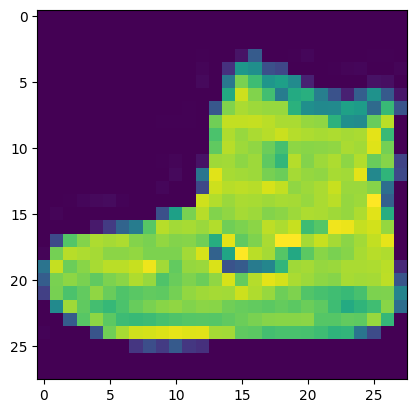

In [10]:
plt.imshow(img)

In [11]:
img_label = y_train[0]

In [12]:
img_label

9

## Preprocessing the Data

In [17]:
X_train.shape

(60000, 28, 28)

#### Normalize

In [16]:
X_train[0].max()

255

In [18]:
X_train = X_train / 255

#### Reshape X to 4 dimension

In [21]:
X_train = X_train.reshape(60000,28,28,1)

In [23]:
X_test.shape

(10000, 28, 28)

In [24]:
X_test = X_test.reshape(10000,28,28,1)

In [25]:
X_test.shape

(10000, 28, 28, 1)

#### One Hot Encoding



In [27]:
y_train = to_categorical(y_train)

In [29]:
y_test = to_categorical(y_test)

## Define Model

In [32]:
model = Sequential()

# Convolution Layer
model.add(Conv2D(input_shape=X_train.shape[1:], filters=32, kernel_size=(4,4)))

# MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer
model.add(Conv2D(input_shape=X_train.shape[1:], filters=64, kernel_size=(4,4)))

# MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer
model.add(Conv2D(input_shape=X_train.shape[1:], filters=32, kernel_size=(4,4)))

# MaxPooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(units=128, activation="relu"))

# Dense Layer
model.add(Dense(units=64, activation="relu"))

# Output Layer
model.add(Dense(units=10, activation="softmax"))

# Compile Layer
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 32)          32800     
                                                                 
 flatten (Flatten)           (None, 32)               